In [30]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns=ind.columns.str.strip()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhc_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


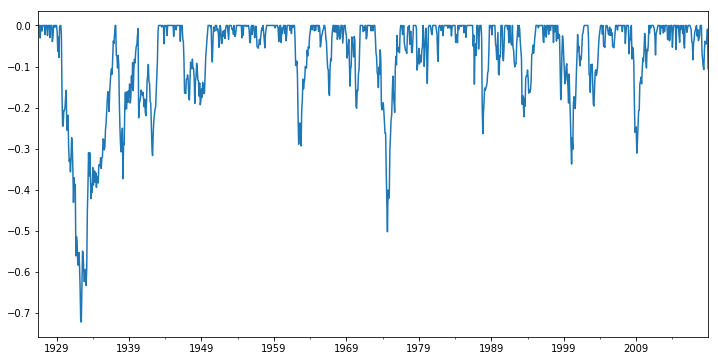

In [32]:
erk.drawdown(ind["Food"])["Drawdowns"].plot(figsize=(12,6))

In [33]:
erk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

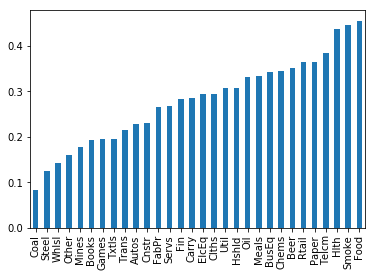

In [36]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar()

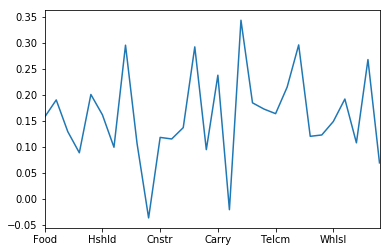

In [43]:
er = erk.annual_rets(ind["1995":"2000"], 12)
er.plot()

In [46]:
cov = ind["1995":"2000"].cov()
cov.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,0.001282,0.000027,0.000613,0.001146,0.000547,0.001419,0.000829,0.000034,0.000933,0.000858,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,0.001945,0.000131,0.000666,0.001107,0.001296,0.001804,0.000272,0.001261,0.000672,0.000631,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,0.001181,0.000167,0.000668,-0.000013,0.000223,0.001485,0.001311,-0.000544,0.000849,0.001118,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,0.001723,0.002670,0.002498,0.001980,0.001994,0.001644,0.001600,0.001557,0.000968,0.000023,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,0.001531,0.001797,0.001704,0.002084,0.001550,0.001301,0.001281,0.002051,0.000868,0.000455,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283


In [47]:
cov.shape

(30, 30)